# Downloading Dataset from Kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mikhailma/house-rooms-streets-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/shriyansh/.cache/kagglehub/datasets/mikhailma/house-rooms-streets-image-dataset/versions/1


# Importing Necessary Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# Managing and Loading Image Paths from a Local Dataset Directory

In [3]:
data_dir = "/Users/shriyansh/.cache/kagglehub/datasets/mikhailma/house-rooms-streets-image-dataset/versions/1/kaggle_room_street_data"

In [4]:
labels = os.listdir(data_dir)
labels.remove('.DS_Store')
labels

['house_data', 'street_data']

In [5]:
label_path = []
for i in labels:
    path = os.path.join(data_dir, i)
    label_path.append(path)
label_path

['/Users/shriyansh/.cache/kagglehub/datasets/mikhailma/house-rooms-streets-image-dataset/versions/1/kaggle_room_street_data/house_data',
 '/Users/shriyansh/.cache/kagglehub/datasets/mikhailma/house-rooms-streets-image-dataset/versions/1/kaggle_room_street_data/street_data']

In [6]:
images = []
for i in label_path:
    img = os.listdir(i)
    for j in img:
        images.append(os.path.join(i,j))

In [7]:
len(images)

11050

# Visualizing Sample Images 

Images of Room


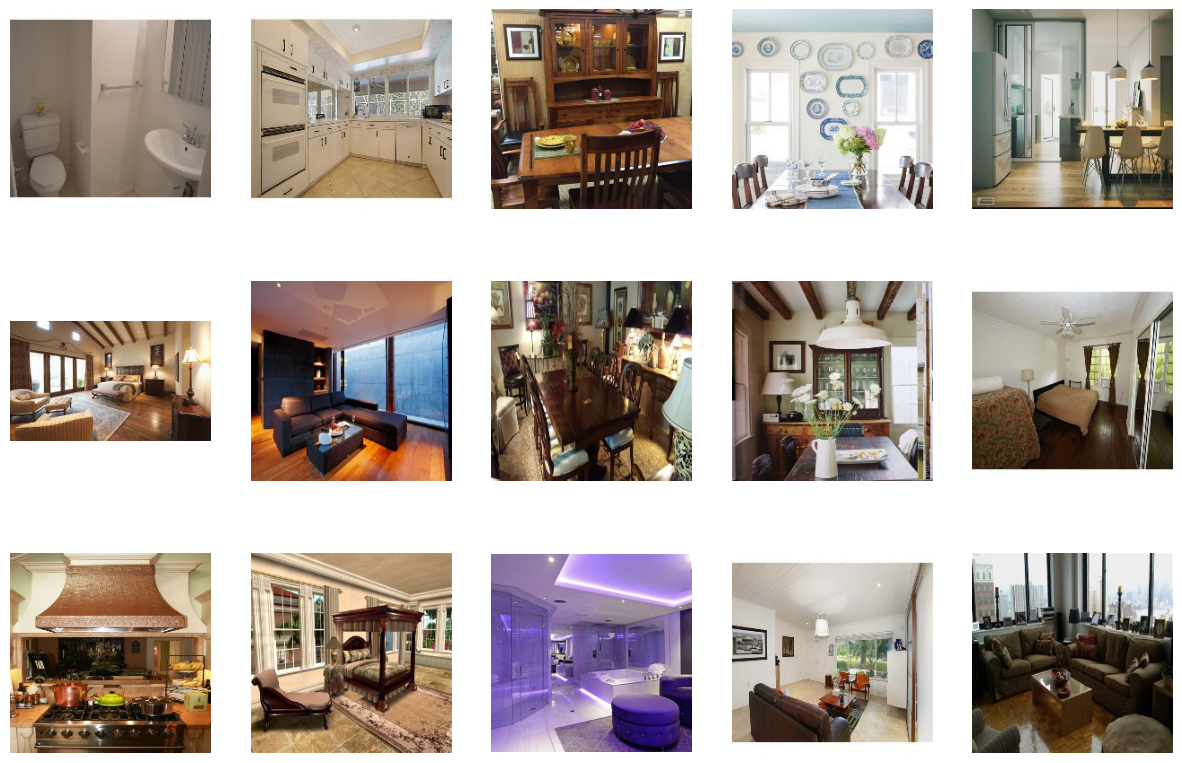

In [8]:
print("Images of Room")
fig,axes = plt.subplots(3,5,figsize=(15,10))
for i,j in enumerate(images[:15]):
    img = Image.open(j)
    row = i//5
    col = i%5
    ax = axes[row,col]
    ax.imshow(img)
    ax.axis('off')
plt.show()

Images of Streets


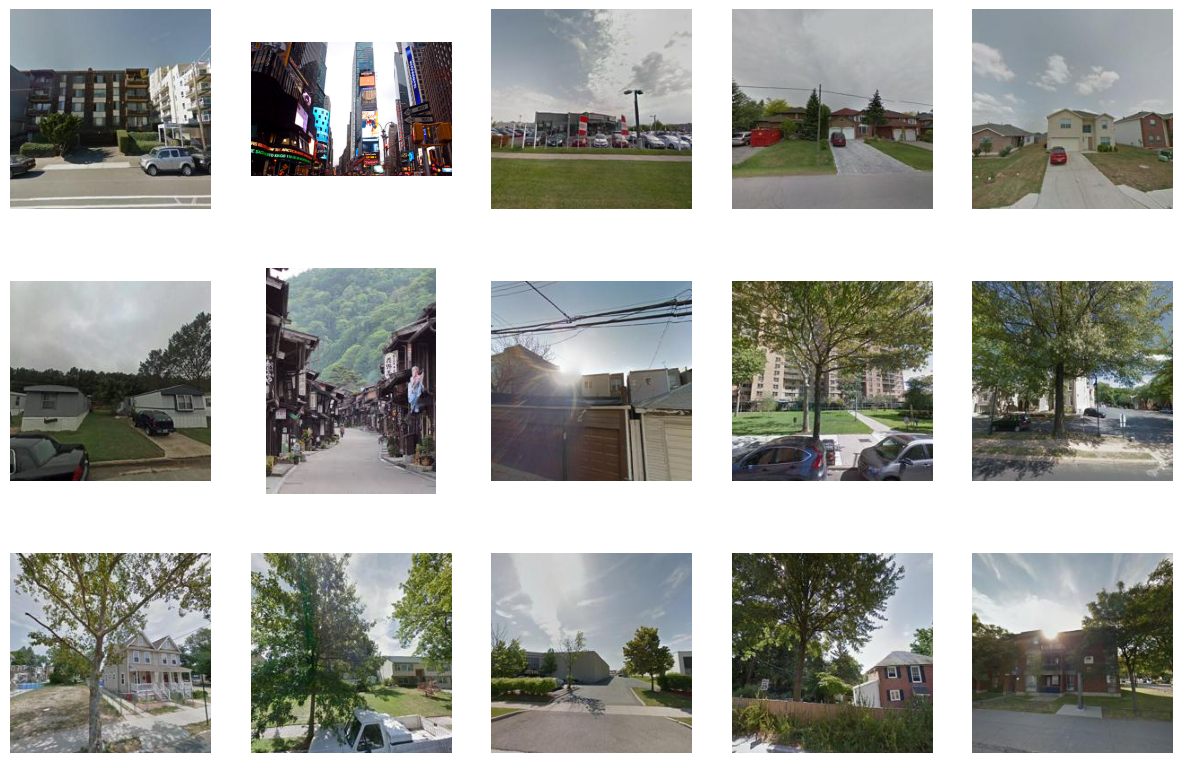

In [12]:
print("Images of Streets")
fig,axes = plt.subplots(3,5,figsize=(15,10))
for i,j in enumerate(images[11035:]):
    img = Image.open(j)
    row = i//5
    col = i%5
    ax = axes[row,col]
    ax.imshow(img)
    ax.axis('off')
plt.show()

# Data Pre-processing

In [13]:
x = []
l = []
for i,y in zip(label_path,labels):
    img = os.listdir(i)
    for j in img:
        img_path = os.path.join(i,j)
        new_img = cv2.imread(img_path)
        if new_img is not None:
            new_img = cv2.resize(new_img,(224,224))
            # Rotate the image by 90 degrees
            rows, cols = new_img.shape[:2]
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)  # Rotation matrix
            new_img = cv2.warpAffine(new_img, M, (cols, rows))
            x.append(new_img)
            l.append(y)

In [14]:
data = pd.DataFrame(data = l, columns  =['Target'])
data.head()

,Target
0,house_data
1,house_data
2,house_data
3,house_data
4,house_data


In [15]:
data.value_counts()

Target     
house_data     6118
street_data    4930
Name: count, dtype: int64

In [16]:
y = data['Target']
map_data = {'house_data':0, 'street_data':1}
y = y.map(map_data)

In [17]:
x = np.array(x)
x.shape

(11048, 224, 224, 3)

In [18]:
x = x.astype('float32')
x = x/255.0
x.shape

(11048, 224, 224, 3)

# Data Splitting

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Model Building

In [20]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape = (224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience = 2,
    restore_best_weights=True
)

# Model Training

In [22]:
history = model.fit(x_train,y_train,epochs=10, batch_size=64, validation_data=(x_test,y_test), callbacks = [early_stopping])

Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.7408 - loss: 0.8168 - val_accuracy: 0.9312 - val_loss: 0.1880
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.9505 - loss: 0.1387 - val_accuracy: 0.9606 - val_loss: 0.1113
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9657 - loss: 0.0911 - val_accuracy: 0.9054 - val_loss: 0.2284
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.9672 - loss: 0.0862 - val_accuracy: 0.9692 - val_loss: 0.0887
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 400s 3s/step - accuracy: 0.9860 - loss: 0.0425 - val_accuracy: 0.9584 - val_loss: 0.1105
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.9852 - loss: 0.0411 - val_accuracy: 0.9729 - val_loss: 0.0727
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 796s 6s/step - accuracy: 0.9916 - loss: 0.0268 - val_accuracy: 0.9719 - val_loss: 0.0901
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.9856 - loss: 0.0405 - val_accu

# Model Evaluation

In [23]:
model.evaluate(x_test,y_test)

70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.9765 - loss: 0.0650


[0.06948061287403107, 0.9746606349945068]

In [24]:
y_pred = model.predict(x_test)

70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step


In [25]:
y_pred_labels = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1244
           1       0.97      0.97      0.97       966

    accuracy                           0.97      2210
   macro avg       0.97      0.97      0.97      2210
weighted avg       0.97      0.97      0.97      2210



In [26]:
pred1 = model.predict(x_test[100:110])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [27]:
pred1 = (pred1> 0.5).astype(int)

In [28]:
print(y_test[100:110], "\n",pred1)

4343    0
1710    0
8677    1
3708    0
5453    0
3601    0
3100    0
5666    0
3058    0
4608    0
Name: Target, dtype: int64 
 [[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [29]:
pred2 = model.predict(x_test[140:150])
pred2 = (pred2> 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [30]:
print(y_test[141:150], pred2)

9113    1
6395    1
7265    1
9701    1
9136    1
8719    1
5076    0
8417    1
1201    0
Name: Target, dtype: int64 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]]


In [65]:
# Assuming 'model' is your trained model
model.save('model3.h5') 